## Введение
* Обучение нейронных сетей можно представить как задачу
оптимизации.
* Задачей оптимизации называется задача о нахождении
экстремума (минимума или максимума) функции.
* В нейронной сети оптимизируется функция ошибки.

Градиентный спуск

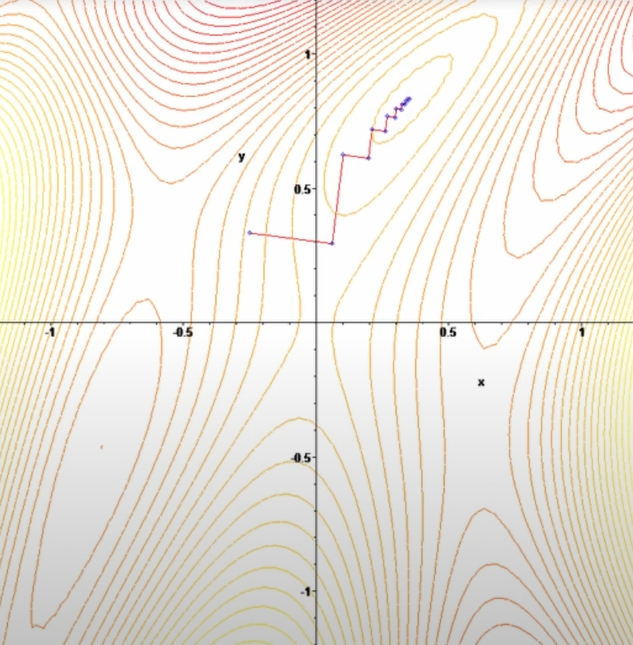

${\textstyle x^{[k+1]} = x^{[k]} - \lambda^{[k]} \nabla f(x^{[k]})}$

In [ ]:
#@title Импорт библиотек
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

## Обучение однослойного персептрона

In [ ]:
#@title Без смещения
# Создание класса
class Perceptron:
  # Конструктор ИНС
  def __init__(self, # внутренний параметр относится именно к этому классу
               input_count, # Кол-во вх. нейронов
               output_count, # Кол-во вых. нейронов
               learning_rate): # Скорость обучения
    self.input_count = input_count
    self.output_count = output_count
    self.final_outputs = None # Итоговые выходы
    self.output_errors = None # Ошибки на каждой итерации

    # Создание весов НС
    # Сначала указываем центр распределения весов (0),
    # потом - стандартное отклонение = pow(self.input_count, -0.5)
    # и после - форму матрицы со случайными значениями (кол-во выходов, кол-во входов)
    self.weights = np.random.normal(0.0, pow(self.input_count, -0.5),
                                   (self.output_count,
                                   self.input_count))
    self.output = None
    self.learning_rate = learning_rate
    self.activation_function = scipy.special.expit # Используем сигмоиду

  # Прогнозирование нейронной сетью
  def predict(self, inputs_list):
    # Создание матрицы из входных значений
    inputs = np.array(inputs_list, ndmin = 2).T
    # Считаем сигнал, который поступает в нейроны
    final_inputs = np.dot(self.weights, inputs)
    # Считаем сигналы, которые испускают нейроны
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

  # Обучение нейронной сети
  def train(self, input_list,
            target_list): # Целевые значения
    # Создание матрицы из входных и выходных значений
    inputs = np.array(input_list, ndmin = 2).T
    targets = np.array(target_list, ndmin = 2).T

    # Считаем сигнал, который поступает в нейроны
    # self.weghts = [[0.69132613]], inputs = [[1]]
    # self_inputs = [[0.69132613]]
    final_inputs = np.dot(self.weights, inputs)

    # Считаем сигналы, которые испускают нейроны
    # final_outputs = [[0.66626187]]
    self.final_outputs = self.activation_function(final_inputs)

    # Считаем ошибку прогноза
    # output_errors = [[0.33373813]]
    self.output_errors = targets - self.final_outputs

    # Изменение веса = [[0.0074209]]
    self.weights += self.learning_rate * np.dot((self.output_errors * self.final_outputs * (1.0 - self.final_outputs)),
                                                  np.transpose(inputs))

set(dir(Perceptron))-set(dir(object)) # Проверка атрибутов в конструкторе

{'__dict__', '__module__', '__weakref__', 'predict', 'train'}

In [ ]:
#@title Создание нейронной сети
# Устанавдиваем кол-во входов и выходов
input_count = 1
output_count = 1

# Устанавливаем значение скорости обучения
learning_rate = 0.1

# Создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)
simple_perceptron.weights

array([[0.00178446]])

In [ ]:
#@title Обучение нейронной сети
# Задача: обучить нейронную сеть определять, является ли число положительным
weights = {'positive': [], 'negative': []}
outputs = {'positive': [], 'negative': []}
output_errors = {'positive': [], 'negative': [], 'mean': []}

X_train = [[1],
           [-1]]
y_train = [[1],
           [0]]

# Проводим обучение персептрона
for epoch in range(1000):
  # Показываем первый пример
  simple_perceptron.train(X_train[0], y_train[0])
  weights['positive'].append(simple_perceptron.weights.copy())
  outputs['positive'].append(simple_perceptron.final_outputs.copy())
  error_1 = simple_perceptron.output_errors.copy()
  output_errors['positive'].append(error_1)

  # Показываем второй пример
  simple_perceptron.train(X_train[1], y_train[1])
  weights['negative'].append(simple_perceptron.weights.copy())
  outputs['negative'].append(simple_perceptron.final_outputs.copy())
  error_2 = simple_perceptron.output_errors.copy()
  output_errors['negative'].append(error_2)

  output_errors['mean'].append(np.mean([error_1, error_2]))

In [ ]:
epoch_weights = np.array(weights['negative'])
final_outputs = np.array(outputs['negative'])
epoch_errors = np.array(output_errors['mean'])

In [ ]:
epoch_weights = epoch_weights.reshape(len(epoch_weights))
final_outputs = final_outputs.reshape(len(final_outputs))
epoch_errors = epoch_errors.reshape(len(epoch_errors))

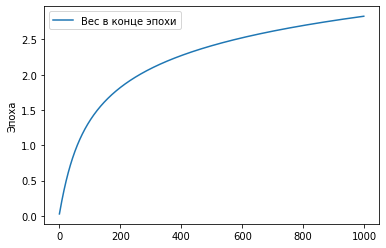

In [ ]:
plt.plot(epoch_weights, label = 'Вес в конце эпохи')
plt.ylabel('Эпоха')
plt.legend()
plt.show()

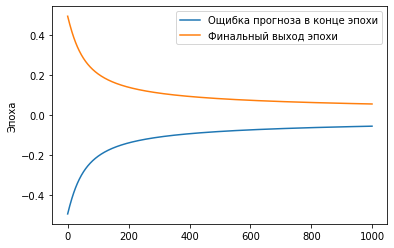

In [ ]:
final_errors = np.array(output_errors['negative'])
final_errors = final_errors.reshape(len(final_errors))

plt.plot(final_errors, label = 'Ощибка прогноза в конце эпохи')
plt.plot(final_outputs, label = 'Финальный выход эпохи')
plt.ylabel('Эпоха')
plt.legend()
plt.show()

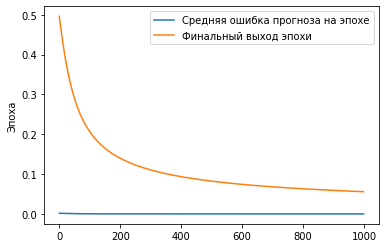

In [ ]:
plt.plot(epoch_errors, label = 'Средняя ошибка прогноза на эпохе')
plt.plot(final_outputs, label = 'Финальный выход эпохи')
plt.ylabel('Эпоха')
plt.legend()
plt.show()

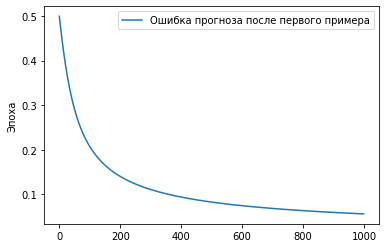

In [ ]:
start_errors = np.array(output_errors['positive'])
start_errors = start_errors.reshape(len(start_errors))

plt.plot(start_errors, label = 'Ошибка прогноза после первого примера')
plt.ylabel('Эпоха')
plt.legend()
plt.show()

In [ ]:
#@title Знание матрицы весов
simple_perceptron.weights

array([[2.82959022]])

In [ ]:
#@title Пример прогноза
print(simple_perceptron.predict([1.0]))
print(simple_perceptron.predict([-1.0]))
print(simple_perceptron.predict([0]))

[[0.94425404]]
[[0.05574596]]
[[0.5]]


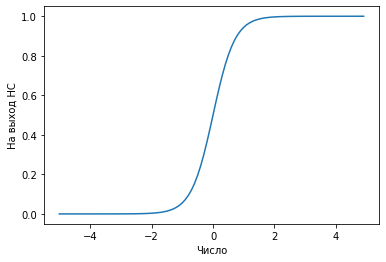

In [ ]:
#@title Как выглядит выход перцептрона в зависимости от входа
outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  output = simple_perceptron.predict([i])
  outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.xlabel('Число')
plt.ylabel('На выход НС')
plt.show()

## Задача логического "ИЛИ"

In [ ]:
# Устанавливаем кол-во входов и выходов
input_count = 2
output_count = 1

# Уставливаем значение скорости обучения
learning_rate = 0.1

# Создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)

# Проводим обучение персептрона
x = [[-1, -1],
     [-1, 1],
     [1, -1],
     [1, 1]]
y = [[0],
     [1],
     [1],
     [1]]

for _ in range(0, 1000):
  # Показываем первый пример
  simple_perceptron.train(x[0], y[0])
  simple_perceptron.train(x[1], y[1])
  simple_perceptron.train(x[2], y[2])
  simple_perceptron.train(x[3], y[3])

print(simple_perceptron.predict(x[0]))
print(simple_perceptron.predict(x[1]))
print(simple_perceptron.predict(x[2]))
print(simple_perceptron.predict(x[3]))

[[0.035459]]
[[0.49685551]]
[[0.50314449]]
[[0.964541]]


In [ ]:
#@title Процесс обучения где есть еще и $-0.5$
# Устанавливаем кол-во входов и выходов
input_count = 1
output_count = 1

# Уставливаем значение скорости обучения
learning_rate = 0.1

# Создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)

# Проводим обучение персептрона
for _ in range(0, 1000):
  # Показываем первый пример
  simple_perceptron.train([1.0], y[1])
  # Показываем второй пример
  simple_perceptron.train([-0.5], y[1])
  # Показываем третий пример
  simple_perceptron.train([-1.0], y[0])

print(simple_perceptron.predict([1.0]))
print(simple_perceptron.predict([-0.5]))
print(simple_perceptron.predict([-1.0]))

[[0.78285464]]
[[0.34497758]]
[[0.21714536]]


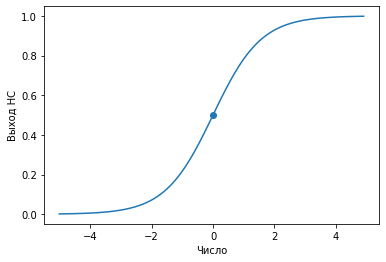

In [ ]:
outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  output = simple_perceptron.predict([i])
  outputs.append(output[0])

plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.scatter(0, simple_perceptron.predict([0]))
plt.xlabel('Число')
plt.ylabel('Выход НС')
plt.show()

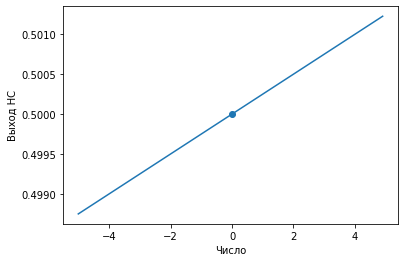

In [ ]:
outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  simple_perceptron.weights = [[0.001]]
  output = simple_perceptron.predict([i])
  outputs.append(output[0])

plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.scatter(0, simple_perceptron.predict([0]))
plt.xlabel('Число')
plt.ylabel('Выход НС')
plt.show()

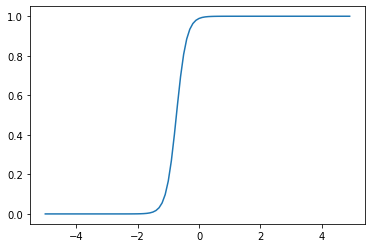

In [ ]:
# Устанавливаем кол-во входов и выходов
input_count = 2
output_count = 1

# Уставливаем значение скорости обучения
learning_rate = 0.3

# Создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)

# Проводим обучение персептрона
for _ in range(0, 1000):
  # Показываем первый пример
  simple_perceptron.train([1.0, 1], y[1])
  # Показываем второй пример
  simple_perceptron.train([-0.5, 1], y[1])
  # Показываем третий пример
  simple_perceptron.train([-1.0, 1], y[0])

outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  output = simple_perceptron.predict([i, 1])
  outputs.append(output[0])

plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()

In [ ]:
#@title Создадим класс нейронной сети V2
class Perceptron_V2:
  # Конструктор ИНС
  def __init__(self, input_count, output_count, learning_rate):
    self.input_count = input_count + 1
    self.output_count = output_count
    self.weights = np.random.normal(0.0, pow(self.input_count, -0.5),
                                   (self.output_count,
                                   self.input_count))
    self.output = None
    self.learning_rate = learning_rate
    self.activation_function = scipy.special.expit

  # Обучение нейронной сети
  def train(self, input_list, target_list):
      inputs = np.array(input_list + [1], ndmin = 2).T
      targets = np.array(target_list, ndmin = 2).T

      final_inputs = np.dot(self.weights, inputs)
      final_outputs = self.activation_function(final_inputs)
      output_errors = targets - final_outputs
      self.weights += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                                  np.transpose(inputs))

  # Прогнозирование нейронной сетью
  def predict(self, inputs_list):
      inputs = np.array(inputs_list + [1], ndmin = 2).T
      final_inputs = np.dot(self.weights, inputs)
      final_outputs = self.activation_function(final_inputs)
      return final_outputs


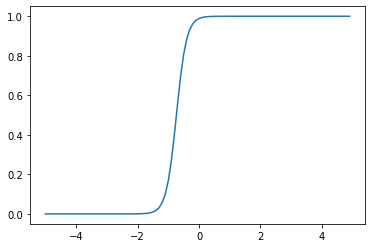

In [ ]:
# Устанавливаем кол-во входов и выходов
input_nodes = 1
output_nodes = 1

# Уставливаем значение скорости обучения
learning_rate = 0.3

# Создаем персептрон
simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

# Проводим обучение персептрона
for _ in range(0, 1000):
  # Показываем первый пример
  simple_perceptron.train([1.0], y[1])
  # Показываем второй пример
  simple_perceptron.train([-0.5], y[1])
  # Показываем третий пример
  simple_perceptron.train([-1.0], y[0])

outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  output = simple_perceptron.predict([i])
  outputs.append(output[0])

plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()

_____________________

# Логическое "И"

In [ ]:
#@title Импорт для визуализации
from pylab import meshgrid
from pylab import cm
from pylab import imshow
from pylab import contour
from pylab import clabel
from pylab import colorbar
from pylab import axis
from pylab import title
from pylab import show

[[0.02135978]]
[[0.50954941]]
[[0.49045059]]
[[0.97864022]]


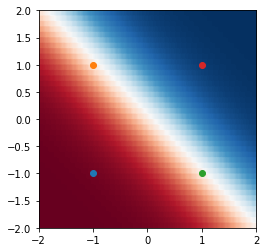

In [ ]:
#@title Без смещения
input_nodes = 2
output_nodes = 1
learning_rate = 0.3

simple_perceptron = Perceptron(input_nodes, output_nodes, learning_rate)

for _ in range(0, 1000):
  simple_perceptron.train([1, 1], [1])
  simple_perceptron.train([1, -1], [0])
  simple_perceptron.train([-1, 1], [0])
  simple_perceptron.train([-1, -1], [0])

outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
  t = []
  for x1 in X1[0, :]:
    output = simple_perceptron.predict([x1, x2])
    t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow(Z, cmap = cm.RdBu, extent = [-2, 2, 2, -2]) # Drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)

# Adding the Contour lines with labels
# cset = contour(Z, np.arange(-1, 1.5, 0.2), linewidths = 2, cmap = cm.Set2)
# clabel(cset, inline = True, fmt = '%1.1f', fontsize = 10)
# colorbar(im) # Adding the colorbar on the right
# latex fashion title
title('')
plt.ylim(-2, 2)
print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))

[[9.90010951e-05]]
[[0.04421677]]
[[0.04418515]]
[[0.95575157]]


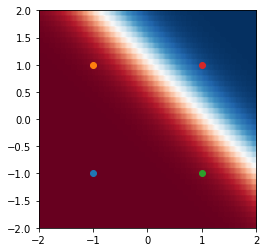

In [ ]:
#@title Со смещением
input_nodes = 2
output_nodes = 1
learning_rate = 0.3

simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

for _ in range(0, 1000):
  simple_perceptron.train([1, 1], [1])
  simple_perceptron.train([1, -1], [0])
  simple_perceptron.train([-1, 1], [0])
  simple_perceptron.train([-1, -1], [0])

outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
  t = []
  for x1 in X1[0, :]:
    output = simple_perceptron.predict([x1, x2])
    t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow(Z, cmap = cm.RdBu, extent = [-2, 2, 2, -2]) # Drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)

title('')
plt.ylim(-2, 2)
print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))

In [ ]:
print('x1 =>', x1, '\n')
print('x2 =>', x2, '\n')
print('X1 =>', X1, '\n')
print('X2 =>', X2, '\n')
print('Z  =>', Z)

x1 => 1.9000000000000035 

x2 => 1.9000000000000035 

X1 => [[-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 ...
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]] 

X2 => [[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.7  1.7  1.7 ...  1.7  1.7  1.7]
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]] 

Z  => [[2.17403062e-07 2.95476937e-07 4.01588723e-07 ... 1.81902163e-02
  2.45622437e-02 3.30911585e-02]
 [2.17403062e-07 2.95476937e-07 4.01588723e-07 ... 1.81902163e-02
  2.45622437e-02 3.30911585e-02]
 [2.17403062e-07 2.95476937e-07 4.01588723e-07 ... 1.81902163e-02
  2.45622437e-02 3.30911585e-02]
 ...
 [3.30440397e-02 4.43841347e-02 5.93769634e-02 ... 9.99656743e-01
  9.99747419e-01 9.99814146e-01]
 [3.30440397e-02 4.43841347e-02 5.93769634e-02 ... 9.99656743e-01
 

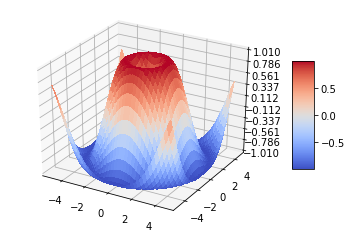

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X11 = np.arange(-5, 5, 0.25)
Y1 = np.arange(-5, 5, 0.25)
X11, Y1 = np.meshgrid(X11, Y1)
R = np.sqrt(X11**2 + Y1**2)
Z1 = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X11, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
X1.shape,X2.shape,Z.shape

((40, 40), (40, 40), (1600, 40))

In [ ]:
X11.shape,Y1.shape,Z1.shape

((40, 40), (40, 40), (40, 40))

In [ ]:
Z = Z[:40,:]
Z.shape

(40, 40)

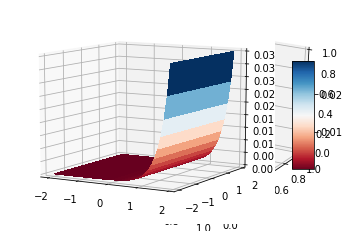

In [ ]:
#@title Визуализация в трехмерном виде

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

X,Y = np.meshgrid(x,y)
#fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.gca(projection = '3d')
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X1,
                       X2,
                       Z,
                       rstride = 1,
                       cstride = 1,
                       cmap = cm.RdBu,
                       linewidth = 0,
                       antialiased = False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(10)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()


## Задача "Исключающего ИЛИ"

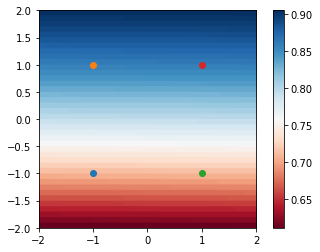

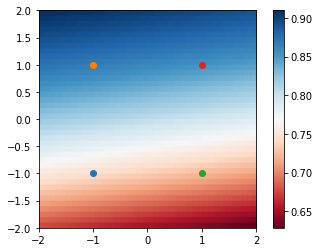

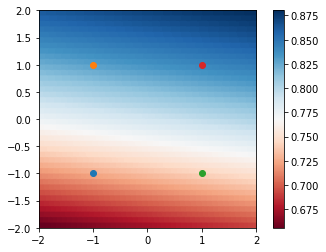

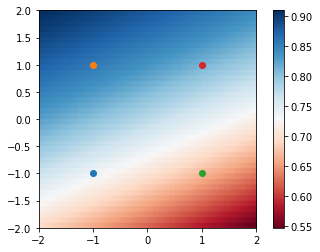

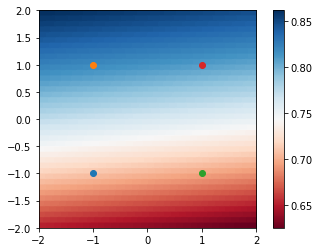

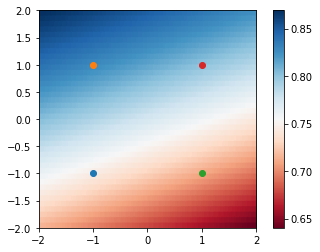

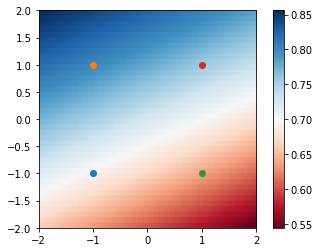

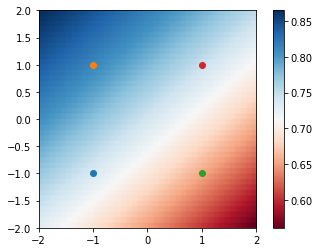

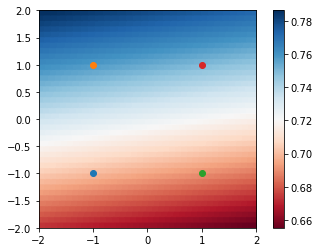

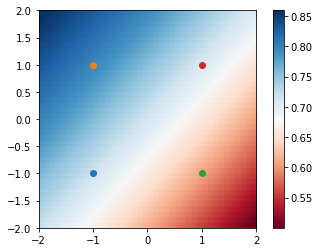

[[0.70769354]]
[[0.60835506]]
[[0.79716971]]
[[0.71603796]]


In [ ]:
#@title Пример того, как НС не справляется с задачей
input_nodes = 2
output_nodes = 1
learning_rate = 1

simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

for i in range(0, 10):
  if i % 4 == 0:
    simple_perceptron.train([1, 1], [1])
  if i % 3 == 0:
    simple_perceptron.train([1, -1], [0])
  if i % 2 == 0:
    simple_perceptron.train([-1, 1], [0])
  else:
    simple_perceptron.train([-1, -1], [1])

  outputs = []
  x1 = np.arange(-2.0, 2.0, 0.1)
  x2 = np.arange(-2.0, 2.0, 0.1)
  X1, X2 = meshgrid(x1, x2)
  Z = []
  for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
      output = simple_perceptron.predict([x1, x2])
      t.append(output[0, 0])
      Z.append(t)
  Z = np.array(Z)
  im = imshow(Z, cmap = cm.RdBu, extent = [-2, 2, 2, -2]) # Drawing the function
  plt.scatter(-1, -1)
  plt.scatter(-1, 1)
  plt.scatter(1, -1)
  plt.scatter(1, 1)
  colorbar(im)
  title('')
  plt.ylim(-2, 2)
  plt.show()

print(simple_perceptron.predict([1, 1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([-1, -1]))

## Многослойный персептрон

Обратное распространение

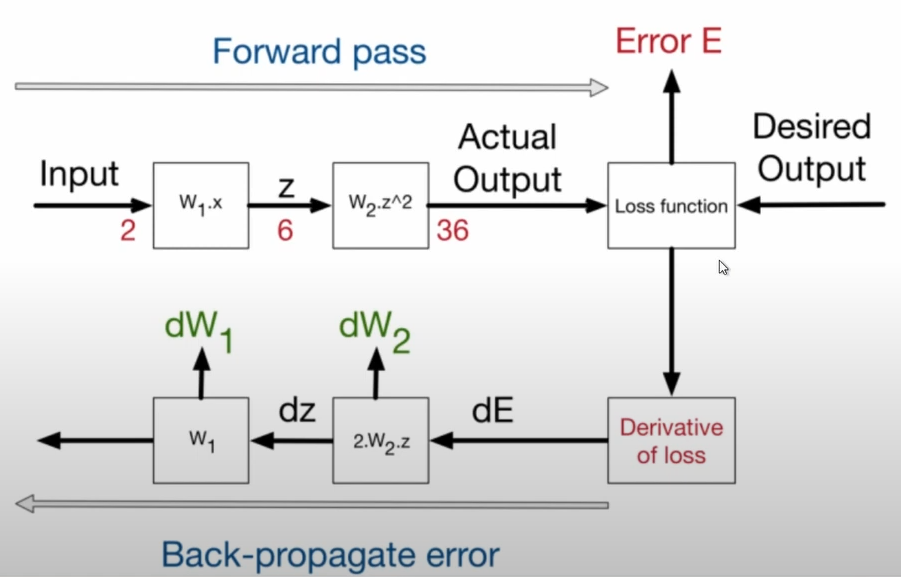

In [ ]:
#@title Neural network class definition
class MultyLayerPerceptron_V2:
  def __init__(self, input_count, hidden_count, output_count, learning_rate):
    self.input_count = input_count
    self.hidden_count = hidden_count
    self.output_count = output_count
    # Веса внутри массива w_i_j связывают i-ый нейрон с j нейроном след. уровня
    self.w_inp_hid = np.random.normal(0.0, pow(self.input_count, -0.5),
                                      (self.hidden_count, self.input_count + 1))
    self.w_hid_out = np.random.normal(0.0, pow(self.hidden_count, -0.5),
                                      (self.output_count, self.hidden_count + 1))
    self.learning_rate = learning_rate
    self.activation_function = scipy.special.expit

  # Обучение нейронной сети
  def train(self, inputs_list, targets_list):
    inputs = np.array(inputs_list + [1], ndmin = 2).T
    tergets = np.array(targets_list, ndmin = 2).T

    # Считаем сигнал, который поступает в нейроны скрытого слоя
    hidden_inputs = np.dot(self.w_inp_hid, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # Добавляем единичный нейрон к скратому слою
    hidden_outputs = np.append(hidden_outputs, [[1]], axis = 0)

    # Считаем сигнал, который поступает в нейроны выходного слоя
    final_inputs = np.dot(self.w_hid_out, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    # Считаем ошибки
    output_errors = tergets - final_outputs

    # Определяем ошибки, которые приходятся на каждый нейрон
    hidden_errors = np.dot(self.w_hid_out.T, output_errors)

    # Обновляем веса
    self.w_hid_out += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                                    np.transpose(hidden_outputs))
    hidden_errors = hidden_errors[0: (hidden_errors.shape[0] - 1), :]
    hidden_outputs = hidden_outputs[0: (hidden_outputs.shape[0] - 1), :]
    self.w_hid_out += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                                    np.transpose(inputs))

  def predict(self, inputs_list):
    inputs = np.array(inputs_list + [1], ndmin = 2).T

    # Считаем сигнал, который поступает в нейроны скрытого слоя
    hidden_inputs = np.dot(self.w_inp_hid, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # Добавляем единичный нейрон к скрытому слою
    hidden_outputs = np.append(hidden_outputs, [[1]], axis = 0)

    # Считаем сигнал, который поступает в нейроны выходного слоя
    final_inputs = np.dot(self.w_hid_out, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

set(dir(MultyLayerPerceptron_V2))-set(dir(object))

{'__dict__', '__module__', '__weakref__', 'predict', 'train'}

In [ ]:
#@title Пример того, как надо
input_nodes = 2
output_nodes = 1
hidden_count = 20
learning_rate = 0.01

simple_perceptron = MultyLayerPerceptron_V2(input_nodes,
                                            hidden_count,
                                            output_nodes,
                                            learning_rate)

for i in range(10000):
  simple_perceptron.train([1, 1], [0])
  simple_perceptron.train([1, -1], [1])
  simple_perceptron.train([-1, 1], [1])
  simple_perceptron.train([-1, -1], [0])

  outputs = []
  x1 = np.arange(-2.0, 2.0, 0.1)
  x2 = np.arange(-2.0, 2.0, 0.1)
  X1, X2 = meshgrid(x1, x2)
  Z = []
  for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
      output = simple_perceptron.predict([x1, x2])
      t.append(output[0, 0])
    Z.append(t)
  Z = np.array(Z)
  im = imshow(Z, cmap = cm.RdBu, extent = [-2, 2, 2, -2])
  plt.scatter(-1, -1)
  plt.scatter(-1, 1)
  plt.scatter(1, -1)
  plt.scatter(1, 1)
  colorbar(im)
  title('')
  plt.ylim(-2, 2)
  plt.show()

print(simple_perceptron.predict([1, 1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([-1, -1]))

ValueError: ignored

In [ ]:
np.random.normal(0.0, pow(input_count, -0.5), (hidden_count, input_count, + 1))

array([[[ 0.33553832],
        [ 0.88865468]],

       [[ 0.99301929],
        [-0.11648313]],

       [[ 0.82949108],
        [ 0.35160324]],

       [[-1.15223024],
        [-0.21809162]],

       [[ 0.14474152],
        [-0.27038858]],

       [[-0.48389671],
        [-0.49122665]],

       [[ 0.56464977],
        [ 0.64739837]],

       [[ 0.11219602],
        [-0.23365508]],

       [[-0.46508722],
        [ 0.3010861 ]],

       [[-1.02515834],
        [-0.36703277]],

       [[-0.58142167],
        [ 0.33939246]],

       [[ 0.05103987],
        [ 0.52755124]],

       [[-1.12243705],
        [-1.12096697]],

       [[ 0.71338041],
        [-0.18057882]],

       [[-0.03353422],
        [-0.5950575 ]],

       [[ 0.20905368],
        [-0.23390081]],

       [[-1.64966945],
        [-0.91482425]],

       [[-1.09317854],
        [ 0.2639062 ]],

       [[ 0.92078057],
        [ 1.03130553]],

       [[-0.06559804],
        [-0.6122918 ]]])

In [ ]:
np.random.normal(0.0, pow(hidden_count, -0.5), (output_count, hidden_count + 1))

array([[ 0.14820972,  0.00242649, -0.4482772 , -0.21940629, -0.06775708,
        -0.20862826,  0.25302835, -0.26174911, -0.19764866, -0.20397022,
         0.00379713,  0.20712945, -0.33479764,  0.09561194,  0.00501981,
         0.15556105,  0.01393203,  0.10413669, -0.07221406, -0.19480578,
         0.02084881]])

In [ ]:
input_nodes = 2
output_nodes = 1
hidden_count = 1
learning_rate = 0.01

mlp = MultyLayerPerceptron_V2(input_nodes,
                                            hidden_count,
                                            output_nodes,
                                            learning_rate)
mlp.predict([1, 0])

array([[0.47311429]])

In [ ]:
input_count = 1
hidden_count = 2
output_count = 1
learning_rate = 0.3

mlp = MultyLayerPerceptron_V2(input_count, hidden_count, output_nodes, learning_rate)

for _ in range(0, 10000):
  mlp.train([1.0], [1])
  mlp.train([0], [0])
  mlp.train([-1.0], [1])

outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
  output = mlp.predict([i])
  outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()

ValueError: ignored

In [ ]:
simple_perceptron.w_hid_out

array([[ 0.07245525, -0.22641709,  0.18411605, -0.24522642,  0.16220041,
        -0.18332302, -0.01089037,  0.14239142,  0.16427309,  0.34917667,
         0.05684599, -0.2863443 ,  0.16052385, -0.42255346, -0.2323705 ,
        -0.26108706, -0.08009501, -0.22911374, -0.0785515 , -0.15848576,
        -0.03525151]])

______________________________